### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# read the image
img = cv2.imread('images/Llama.jpg',0)

# 2D discrete fourier transform on the image
img_fft = np.fft.fft2(img)

# shift the zero frequency component
img_shift = np.fft.fftshift(img_fft)

# get the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(img_shift))

### Just for fun before I start working on it

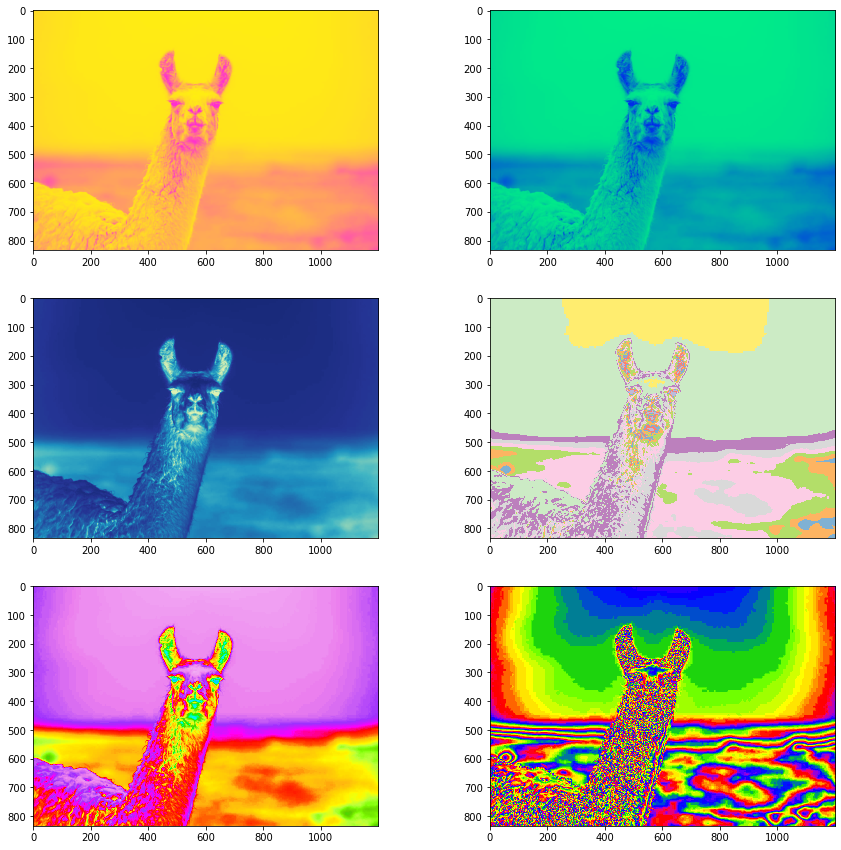

In [4]:
fig, ((one, two), (three, four), (five, six)) = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
one.imshow(img, cmap = 'spring')
two.imshow(img, cmap = 'winter')
three.imshow(img, cmap = 'YlGnBu')
four.imshow(img, cmap = 'Set3')
five.imshow(img, cmap = 'gist_ncar')
six.imshow(img, cmap = 'prism')

Epic

Now, back to work

Text(0.5, 1.0, 'magnitude spectrum')

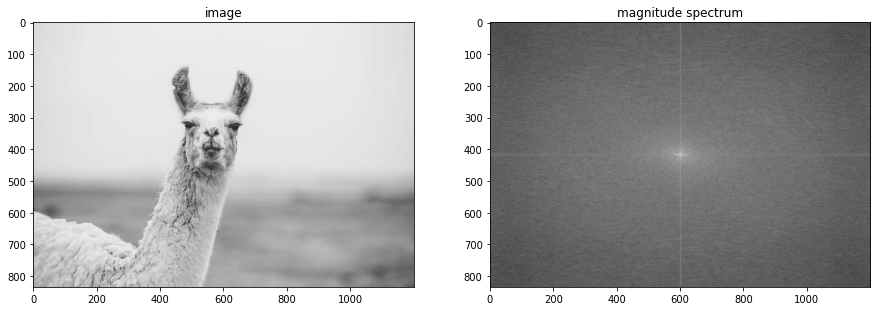

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('image')
ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.set_title('magnitude spectrum')

### Low Pass Filter

Keep the low freq, remove the high freq

In [6]:
# get the dimension of the image 
row, col = img.shape
# print(row,col)

# get the center coord
cen_row, cen_col = row//2, col//2

# make the mask and mask out the low freq
mask_lpf = np.zeros((row, col))
mask_lpf[cen_row-30:cen_row+30, cen_col-20:cen_col+20] = 1

# apply the mask
img_shift_lpf = img_shift*mask_lpf

# inverse the shift
img_ishift_lpf = np.fft.ifftshift(img_shift_lpf)

# inverse fft
img_ifft_lpf = np.fft.ifft2(img_ishift_lpf)

# remove the complex
img_LPF = np.abs(img_ifft_lpf)

Text(0.5, 1.0, 'LPF')

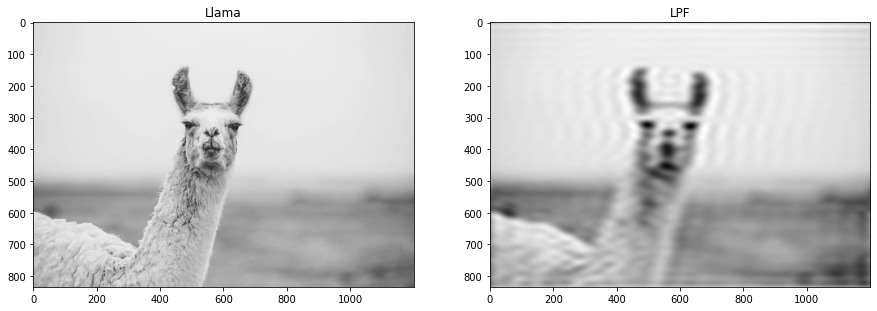

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Llama')
ax2.imshow(img_LPF, cmap = 'gray')
ax2.set_title('LPF')

### High Pass Filter

Keep the high freq, remove the low freq

Which *should* be the opposite of the above, so I should be able to do this *(right...?)*

In [8]:
# make the mask and mask out the high freq
mask_hpf = np.ones((row, col))
mask_hpf[cen_row-30 : cen_row+30, cen_col-20 : cen_col+20] = 0

# apply the mask
img_shift_hpf = img_shift*mask_hpf

# inverse the shift
img_ishift_hpf = np.fft.ifftshift(img_shift_hpf)

# inverse fft
img_ifft_hpf = np.fft.ifft2(img_ishift_hpf)

# remove the complex
img_HPF = np.abs(img_ifft_hpf)

Text(0.5, 1.0, 'HPF / i.e. a very scary looking llama')

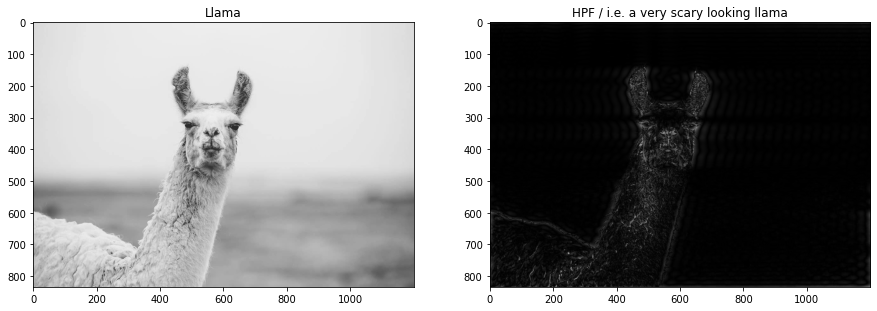

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Llama')
ax2.imshow(img_HPF, cmap = 'gray')
ax2.set_title('HPF / i.e. a very scary looking llama')

### Band Filter 

Coombination of LPF and HPF : keeps the middle range freq but reduce low and high freq

In [10]:
# make the mask and mask out the high freq
mask_bpf = np.ones((row, col))

mask_bpf[275:525, 450:550] = 0 #left
mask_bpf[300:500, 650:750] = 0 #right
mask_bpf[275:375, 450:750] = 0 #top
mask_bpf[425:525, 450:750] = 0 #bottom

# apply the mask
img_shift_bpf = img_shift*mask_bpf

# inverse the shift
img_ishift_bpf = np.fft.ifftshift(img_shift_bpf)

# inverse fft
img_ifft_bpf = np.fft.ifft2(img_ishift_bpf)

# remove the complex
img_BPF = np.abs(img_ifft_bpf)

Text(0.5, 1.0, 'BPF')

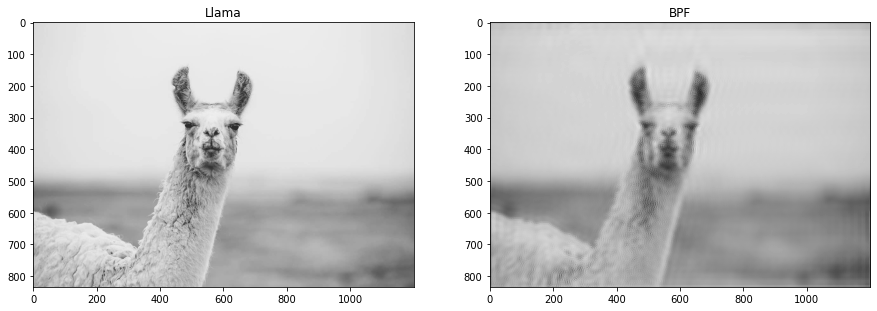

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Llama')
ax2.imshow(img_BPF, cmap = 'gray')
ax2.set_title('BPF')

### Gaussian Blur

In [12]:
Gaussian = cv2.GaussianBlur(img, (15,15), 0)
Gaussian2 = cv2.GaussianBlur(img, (39, 39), 0)

Text(0.5, 1.0, 'More GB')

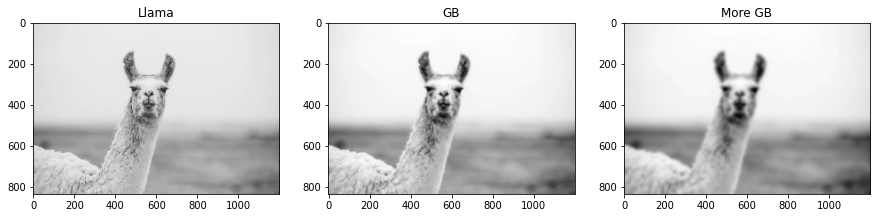

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(25)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Llama')
ax2.imshow(Gaussian, cmap = 'gray')
ax2.set_title('GB')
ax3.imshow(Gaussian2, cmap = 'gray')
ax3.set_title('More GB')

Anddd...for fun one last time before we part...

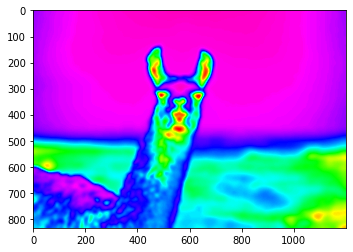

In [15]:
plt.imshow(Gaussian2, cmap = 'gist_rainbow')